In [1]:
import pandas as pd
import numpy as np
import os
from src.util import detect_outliers_zscore
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./data/sierraleone-bumbuna.csv")

In [5]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

# Summery of Statistics

In [7]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


# Missing Value Report

In [14]:
df.isna().sum() # only the comments have a missing value like benin

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         469085
dtype: int64

In [16]:
df.isnull().sum() / len(df) * 100  # percentage of missing values ( comments have 100% missing values)

Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64

In [22]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,467698.000000,0.0
mean,229.712769,130.949609,130.668604,232.220496,222.636799,26.751050,79.887800,1.228969,1.809881,0.383789,141.181214,7.729652,999.930534,0.001086,0.005398,33.807173,33.864272,NaN
std,305.245105,227.596422,160.707810,309.530906,297.204452,4.277239,21.175124,1.262945,1.640681,0.295444,113.944600,7.658823,2.159266,0.032939,0.050378,12.505508,12.060178,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.400000,69.100000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.900000,24.200000,NaN
50%,36.400000,0.000000,34.900000,39.900000,37.800000,25.700000,87.000000,1.000000,1.600000,0.400000,177.300000,7.300000,1000.000000,0.000000,0.000000,27.900000,28.100000,NaN
75%,416.200000,179.900000,247.300000,414.200000,397.600000,29.900000,97.500000,2.100000,2.900000,0.600000,238.400000,12.500000,1001.000000,0.000000,0.000000,43.100000,43.500000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


# Outlier Detection

In [11]:
# there are outliers in the solar radiations columns since they can not be less than zero
outlier_indices = detect_outliers_zscore(df, ['GHI', 'DNI', 'DHI'])
print(f"Outlier indices: {outlier_indices}")

Outlier indices: [False False False ... False False False]


In [20]:
# Set small negative values to 0 (between -10 and 0)
df.loc[(df['GHI'] < 0) & (df['GHI'] > -10), 'GHI'] = 0
df.loc[(df['DNI'] < 0) & (df['DNI'] > -10), 'DNI'] = 0
df.loc[(df['DHI'] < 0) & (df['DHI'] > -10), 'DHI'] = 0

# Drop extreme negative outliers (less than -10)
df = df[(df['GHI'] > -10) & (df['DNI'] > -10) & (df['DHI'] > -10)]

In [ ]:
df[['GHI', 'DNI', 'DHI']].lt(0).sum() # solar radiation cleaned 

GHI    0
DNI    0
DHI    0
dtype: int64

In [26]:
# RH has to be between 0 and 100
df = df[(df["RH"] >= 0 ) & (df["RH"] <= 100)]

In [27]:
df["RH"].count()

np.int64(467698)

In [ ]:
df[df["RH"] >= 0].count() # all RH values are now between 0 and 100

Timestamp        467698
GHI              467698
DNI              467698
DHI              467698
ModA             467698
ModB             467698
Tamb             467698
RH               467698
WS               467698
WSgust           467698
WSstdev          467698
WD               467698
WDstdev          467698
BP               467698
Cleaning         467698
Precipitation    467698
TModA            467698
TModB            467698
Comments              0
dtype: int64

In [29]:
# Outlier detection for sensor readings (ModA, ModB) and wind speed data (WS, WSgust).
# using z-score method
cols_to_check = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
outlier_rows = detect_outliers_zscore(df, cols_to_check)
print(f"Number of rows with outliers: {outlier_rows.sum()}")

# remove outliers
df_clean = df[~outlier_rows].copy()

Number of rows with outliers: 10004


In [ ]:
df_clean.describe() # final clean dataset

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,457694.000000,0.0
mean,219.636327,124.017129,127.301424,222.277150,212.957506,26.697881,80.076046,1.183152,1.747234,0.374738,140.062636,7.598077,999.926949,0.001110,0.004695,33.513116,33.592493,NaN
std,293.824764,218.114588,157.153691,298.750731,286.460813,4.284672,21.210953,1.185714,1.534350,0.284524,114.147585,7.622849,2.160936,0.033297,0.042907,12.315353,11.902748,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.400000,69.200000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.900000,24.200000,NaN
50%,30.700000,0.000000,29.700000,34.500000,32.700000,25.600000,87.500000,1.000000,1.600000,0.400000,176.000000,7.100000,1000.000000,0.000000,0.000000,27.600000,27.900000,NaN
75%,397.600000,160.400000,244.075000,395.200000,379.600000,29.800000,97.600000,2.000000,2.900000,0.600000,238.000000,12.400000,1001.000000,0.000000,0.000000,42.400000,42.800000,NaN
max,1145.000000,813.000000,612.700000,1155.000000,1114.000000,39.900000,100.000000,5.000000,6.700000,2.100000,360.000000,98.400000,1006.000000,1.000000,2.000000,71.800000,70.000000,NaN


In [31]:
df_clean.to_csv("./data/sierraleone-bumbuna-clean.csv", index=False)

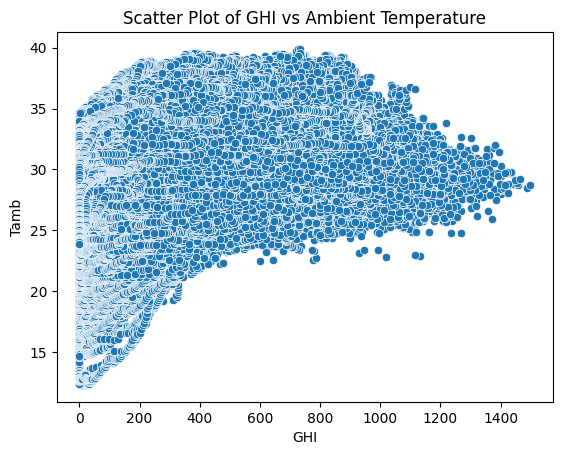

In [32]:
import seaborn as sns
sns.scatterplot(x='GHI', y='Tamb', data=df)
plt.title('Scatter Plot of GHI vs Ambient Temperature')
plt.show()

(array([6.8000e+01, 3.1000e+01, 1.5000e+01, 4.9000e+01, 5.1000e+01,
        1.8000e+02, 3.3500e+02, 4.5600e+02, 6.9900e+02, 8.8500e+02,
        1.0010e+03, 1.1690e+03, 1.6560e+03, 1.7880e+03, 1.9410e+03,
        1.9810e+03, 3.6980e+03, 8.2350e+03, 1.5620e+04, 2.4708e+04,
        3.2475e+04, 3.4927e+04, 2.9659e+04, 2.1288e+04, 1.5563e+04,
        1.1266e+04, 1.1043e+04, 1.1009e+04, 7.8810e+03, 6.8540e+03,
        6.6380e+03, 5.5240e+03, 4.8200e+03, 4.3790e+03, 4.3890e+03,
        4.1250e+03, 4.8820e+03, 4.0550e+03, 4.1060e+03, 4.1570e+03,
        4.0560e+03, 4.1910e+03, 4.2230e+03, 4.4740e+03, 4.3410e+03,
        4.8260e+03, 4.1150e+03, 4.2280e+03, 3.9680e+03, 3.8760e+03,
        3.7480e+03, 3.7190e+03, 3.8810e+03, 3.7400e+03, 4.3190e+03,
        3.7650e+03, 3.9480e+03, 3.6490e+03, 3.5230e+03, 3.6580e+03,
        3.5610e+03, 3.5610e+03, 3.4350e+03, 3.9860e+03, 3.5140e+03,
        3.5330e+03, 3.5550e+03, 3.6410e+03, 3.4710e+03, 3.3020e+03,
        3.6530e+03, 3.5020e+03, 3.8890e+03, 3.55

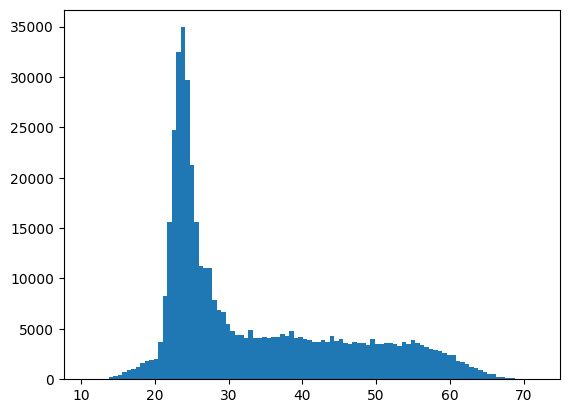

In [33]:
# checking if temperature is realistic
plt.hist(df_clean["TModA"], bins=100)

# Time Series Analysis

C:\Users\Abel Tesfa\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


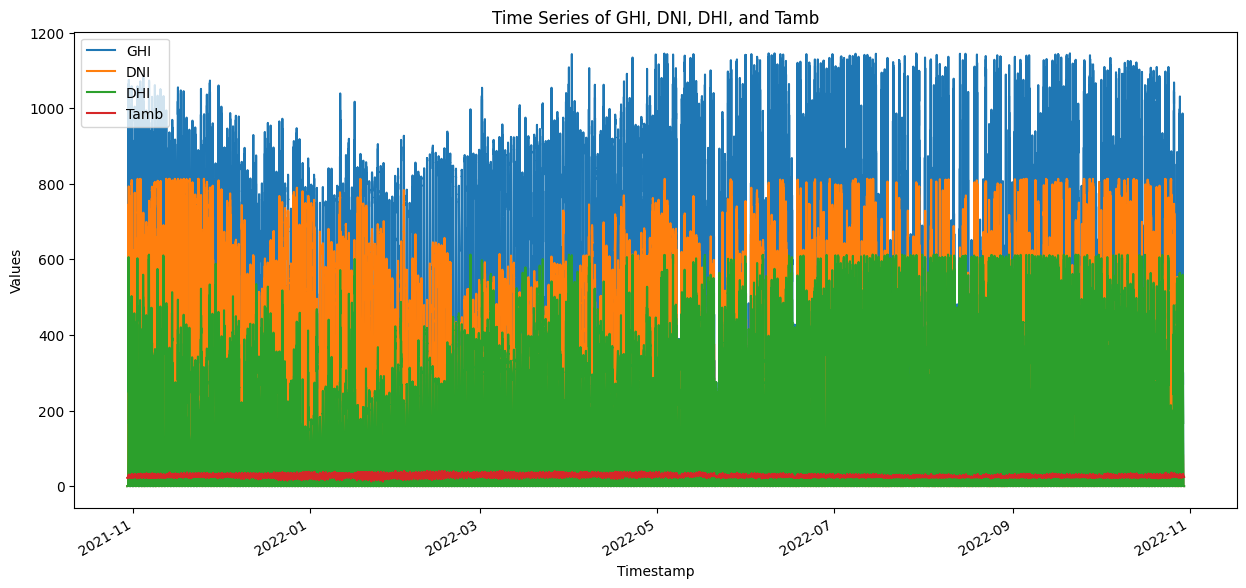

In [34]:
# Line chart of GHI, DNI, DHI, Tamb vs. Timestamp.
clean_df = df_clean.copy()
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)
df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 7))
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

C:\Users\Abel Tesfa\AppData\Local\Temp\ipykernel_21492\3776864059.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_clean.resample('M').mean()


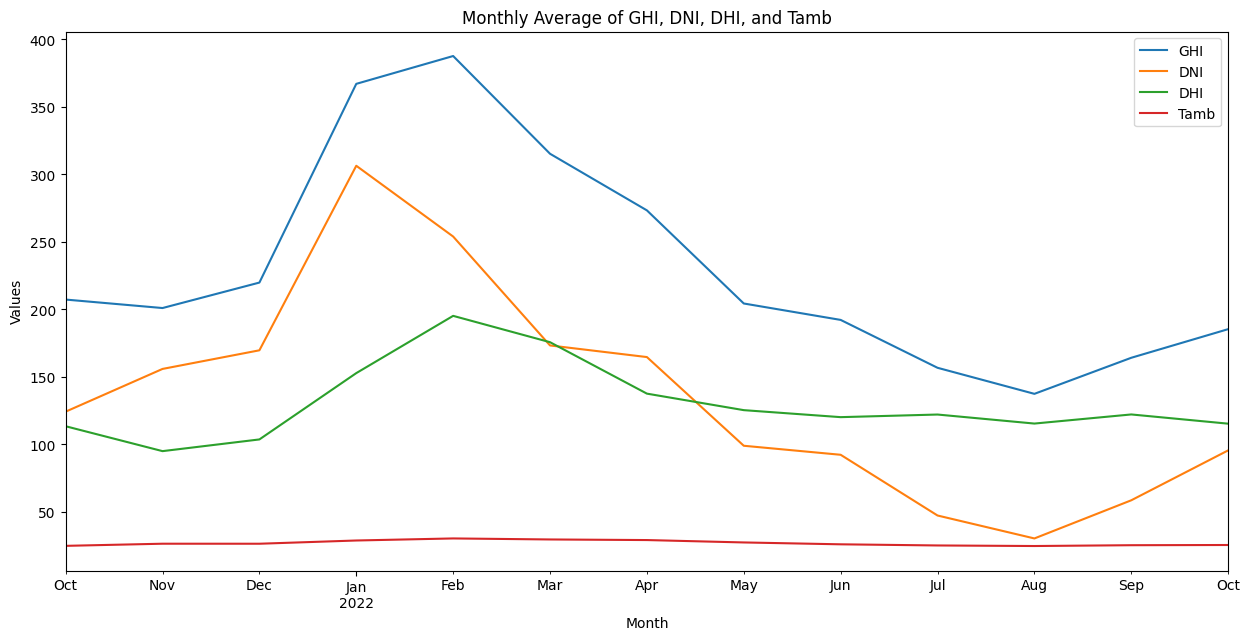

In [35]:
# Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 
# This can help identify seasonal variations or unusual weather events affecting solar energy generation.
monthly_avg = df_clean.resample('M').mean()
monthly_avg[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(15, 7))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.show()